In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
W = [1,2,3]
A = [np.array([10,1]),np.array([2,8]),np.array([-2,-2])]

In [3]:
#Zielfuntion und Graident
def f(x):
    return sum([0.25*w*np.linalg.norm(x-a)**4 for (w,a) in zip(W,A)])

def grad(x):
    return sum([w*(np.linalg.norm(x-a)**2)*(x-a) for (w,a) in zip(W,A)]) 

In [4]:
#Armijo-Regel
def armijo(x,f,grad,s,beta=0.5,gamma=0.01):
    sigma = 1
    while f(x+sigma*s) - f(x) > sigma*gamma*grad@s:
        sigma = sigma*beta
    return sigma

In [5]:
#Algorithmus
x     = [1,-1]
fWert = [f(x)]
while np.linalg.norm( grad(x) ) > 1e-3:
    sigma = armijo(x,f,grad(x),-grad(x))
    x     = x - sigma*grad(x)
    fWert.append(f(x))
x

array([ 2.31004727,  1.91231406])

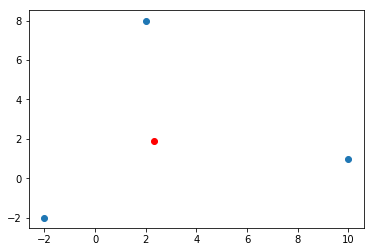

In [6]:
#Ergebnisse
plt.scatter([a[0] for a in A],[a[1] for a in A])
plt.scatter(x[0],x[1],color='red')
plt.show()

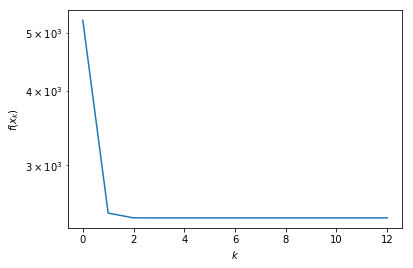

In [7]:
#plt.plot(fWert)
plt.semilogy(fWert)
plt.xlabel(r'$k$')
plt.ylabel(r'$f(x_k)$')
plt.show()

In [8]:
#Überprüfung mit SciPy
from scipy.optimize import minimize
minimize(f,x,jac=grad,tol=1e-6)

      fun: 2450.3454283961864
 hess_inv: array([[ 0.00269308,  0.02191233],
       [ 0.02191233,  1.02673389]])
      jac: array([  3.94595645e-09,   2.42405918e-08])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 2.31004774,  1.91231389])